<a href="https://colab.research.google.com/github/seetaram-oruganti/Credit-Card-Fraud-detection/blob/main/MLP_without_outliers_and_with_data_balancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Exploratory data analysis***

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import imblearn
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.shape

(284807, 31)

In [5]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
#Splitting genuine and fraud transactions
df_fraud=df[df['Class']==1]
df_non_fraud=df[df['Class']==0]

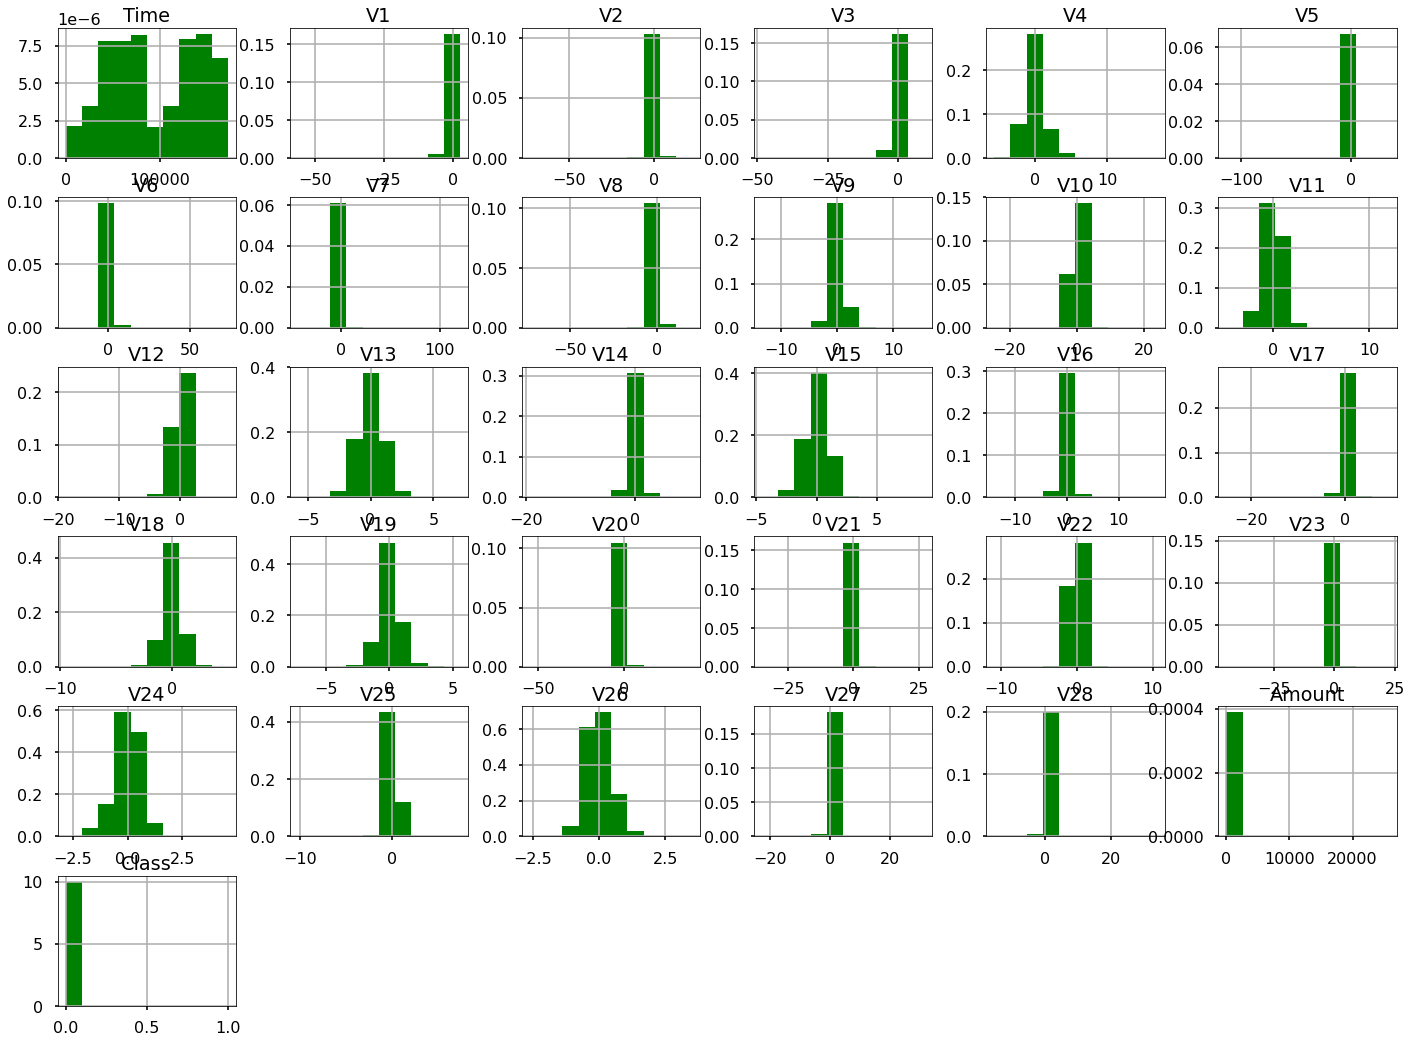

In [8]:
plt.style.use("seaborn-poster")
df.hist(figsize=(24,18),density=True,color="green")
plt.show()

In [9]:
df_fraud.shape

(492, 31)

In [10]:
df_non_fraud.shape

(284315, 31)

Function to remove outliers

In [11]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


# Removing Outliers 
for i in range (1,29):
  name = 'V'+ "%s" %i
  df3=remove_outlier(df,name)


In [12]:
#Splitting genuine and fraud transactions
df_fraud=df3[df3['Class']==1]
df_non_fraud=df3[df3['Class']==0]

print(df3.shape)
print(df_fraud.shape)
print(df_non_fraud.shape)

(254465, 31)
(220, 31)
(254245, 31)


In [13]:
#Data Balancing
df_non_fraud=df_non_fraud.sample(n = 220)
df_non_fraud.head()
df_non_fraud.shape
df_non_fraud.info()

# New Balanced data set with frand and genuine txns 
dfb=df_non_fraud.append(df_fraud)
dfb.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 173761 to 11292
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    220 non-null    float64
 1   V1      220 non-null    float64
 2   V2      220 non-null    float64
 3   V3      220 non-null    float64
 4   V4      220 non-null    float64
 5   V5      220 non-null    float64
 6   V6      220 non-null    float64
 7   V7      220 non-null    float64
 8   V8      220 non-null    float64
 9   V9      220 non-null    float64
 10  V10     220 non-null    float64
 11  V11     220 non-null    float64
 12  V12     220 non-null    float64
 13  V13     220 non-null    float64
 14  V14     220 non-null    float64
 15  V15     220 non-null    float64
 16  V16     220 non-null    float64
 17  V17     220 non-null    float64
 18  V18     220 non-null    float64
 19  V19     220 non-null    float64
 20  V20     220 non-null    float64
 21  V21     220 non-null    float64


(440, 31)

# ***Models without outliers with balanced dataset***

In [14]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 173761 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    440 non-null    float64
 1   V1      440 non-null    float64
 2   V2      440 non-null    float64
 3   V3      440 non-null    float64
 4   V4      440 non-null    float64
 5   V5      440 non-null    float64
 6   V6      440 non-null    float64
 7   V7      440 non-null    float64
 8   V8      440 non-null    float64
 9   V9      440 non-null    float64
 10  V10     440 non-null    float64
 11  V11     440 non-null    float64
 12  V12     440 non-null    float64
 13  V13     440 non-null    float64
 14  V14     440 non-null    float64
 15  V15     440 non-null    float64
 16  V16     440 non-null    float64
 17  V17     440 non-null    float64
 18  V18     440 non-null    float64
 19  V19     440 non-null    float64
 20  V20     440 non-null    float64
 21  V21     440 non-null    float64

In [15]:
X = dfb.iloc[:, :-1]
y = dfb.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [16]:
X_train.shape

(352, 30)

In [17]:
y_train.shape

(352,)

In [18]:
y_test

135395    0
150663    1
39183     1
108258    1
128914    0
         ..
202841    0
189964    0
258408    0
243563    0
259264    0
Name: Class, Length: 88, dtype: int64

# ***Logistic Regression***

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)   

LogisticRegression()

In [20]:
print(classifier.intercept_, classifier.coef_)

[-0.26588258] [[-2.14412062e-05 -3.08089113e-01  1.26441364e-01 -9.61745019e-01
   5.53238260e-01 -1.10322914e-01 -1.67398210e-01 -4.59864793e-01
  -2.67779452e-01 -2.69782279e-02 -4.42938291e-01  3.41872422e-01
  -5.98557463e-01 -1.93851767e-01 -8.95473320e-01 -2.76209776e-01
  -2.87434598e-01 -6.06830578e-01 -9.67706437e-02 -2.13897765e-02
  -5.96822770e-02  1.28273900e-01  3.45439034e-01  5.81945586e-03
   2.49134066e-03 -6.66642455e-02 -6.76847275e-02  7.99239866e-02
  -2.32529749e-02  2.33250612e-03]]


In [21]:
pred = classifier.predict(X_train)

In [22]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 0.9090909090909091


In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
pred_b = classifier.predict(X_test)

In [25]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        45
           1       0.94      0.77      0.85        43

    accuracy                           0.86        88
   macro avg       0.88      0.86      0.86        88
weighted avg       0.88      0.86      0.86        88



In [26]:
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)


In [27]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

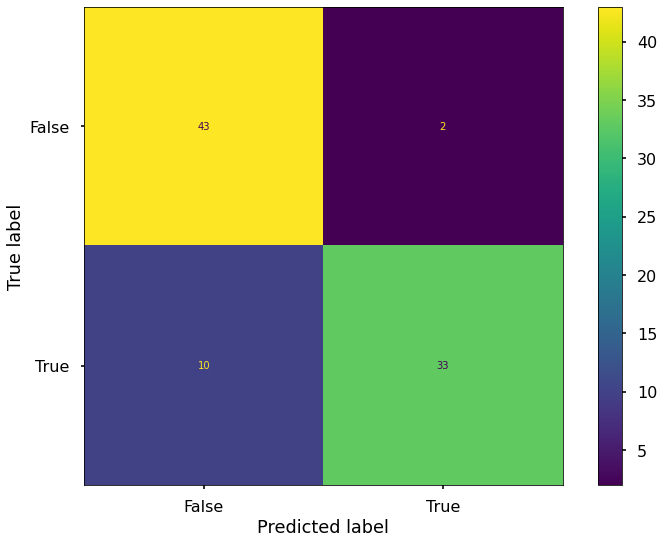

In [28]:
cm_display.plot()
plt.show()

# ***K - Nearest Neighbour***

In [29]:
classifier=KNeighborsClassifier()

In [30]:
classifier.fit(X_train, y_train)   

KNeighborsClassifier()

In [31]:
pred = classifier.predict(X_train)

In [32]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))


Accuracy from sk-learn: 0.7414772727272727


In [33]:
pred_b = classifier.predict(X_test)

In [34]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.51      0.57        45
           1       0.58      0.72      0.65        43

    accuracy                           0.61        88
   macro avg       0.62      0.62      0.61        88
weighted avg       0.62      0.61      0.61        88



In [35]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)

In [36]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

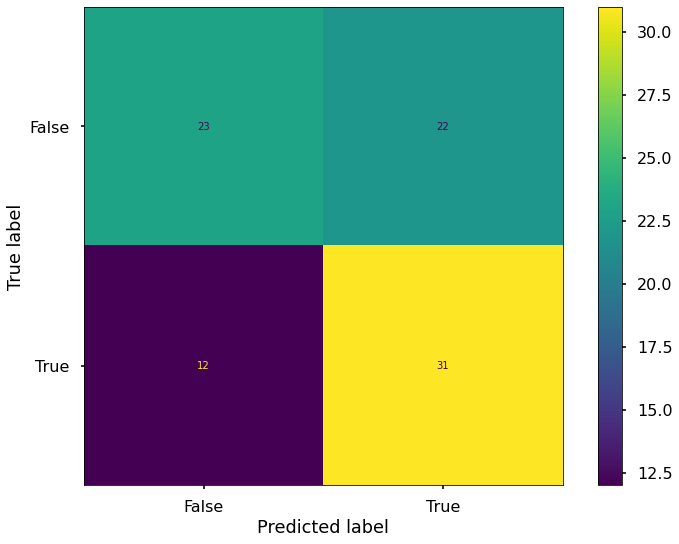

In [37]:
cm_display.plot()
plt.show()

# ***Support Vector Machine***

In [38]:
classifier=SVC()

In [39]:
classifier.fit(X_train, y_train)   

SVC()

In [40]:
pred = classifier.predict(X_train)

In [41]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 0.5482954545454546


In [42]:
pred_b = classifier.predict(X_test)

In [43]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       0.55      0.80      0.65        45
           1       0.61      0.33      0.42        43

    accuracy                           0.57        88
   macro avg       0.58      0.56      0.54        88
weighted avg       0.58      0.57      0.54        88



In [44]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)

In [45]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

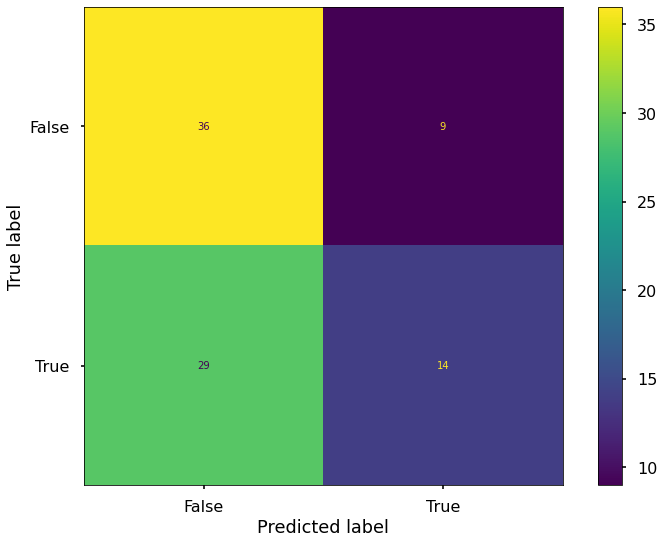

In [46]:
cm_display.plot()
plt.show()

# **Decision Tree Classifier**

In [47]:
classifier=DecisionTreeClassifier()

In [48]:
classifier.fit(X_train, y_train) 

DecisionTreeClassifier()

In [49]:
pred = classifier.predict(X_train)

In [50]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 1.0


In [51]:
# print('Accuracy from DecisionTreeClassifier for training : 0.89')

In [52]:
pred_b = classifier.predict(X_test)

In [53]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        45
           1       0.82      0.84      0.83        43

    accuracy                           0.83        88
   macro avg       0.83      0.83      0.83        88
weighted avg       0.83      0.83      0.83        88



In [54]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

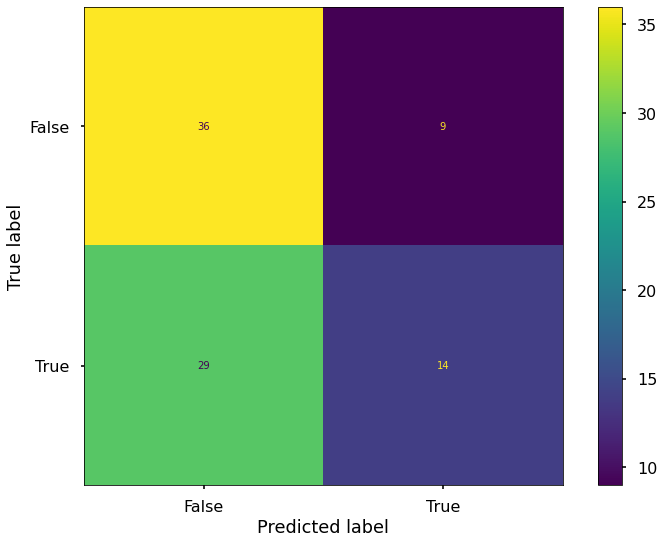

In [55]:
cm_display.plot()
plt.show()